Populating the interactive namespace from numpy and matplotlib


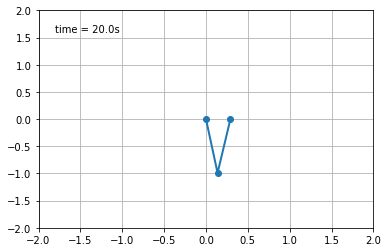

In [5]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
%pylab inline
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('double_pendulum.mp4', fps=15)
plt.show()

# Embedding Matplotlib Animations in IPython Notebooks

*This notebook first appeared as a*
[*blog post*](http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/)
*on*
[*Pythonic Perambulations*](http://jakevdp.github.io).

*License:* [*BSD*](http://opensource.org/licenses/BSD-3-Clause)
*(C) 2013, Jake Vanderplas.*
*Feel free to use, distribute, and modify with the above attribution.*

<!-- PELICAN_BEGIN_SUMMARY -->
I've spent a lot of time on this blog working with matplotlib animations
(see the basic tutorial
[here](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/),
as well as my examples of animating
[a quantum system](http://jakevdp.github.io/blog/2012/09/05/quantum-python/),
[an optical illusion](http://jakevdp.github.io/blog/2012/09/26/optical-illusions-in-matplotlib/),
[the Lorenz system in 3D](http://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/),
and [recreating Super Mario](http://jakevdp.github.io/blog/2013/01/13/hacking-super-mario-bros-with-python/)).
Up until now, I've not have not combined the animations with IPython notebooks.
The problem is that so far the integration of IPython with matplotlib is
entirely static, while animations are by their nature dynamic.  There are some
efforts in the IPython and matplotlib development communities to remedy this,
but it's still not an ideal setup.

I had an idea the other day about how one might get around this limitation
in the case of animations.  By creating a function which saves an animation
and embeds the binary data into an HTML string, you can fairly easily create
automatically-embedded animations within a notebook.
<!-- PELICAN_END_SUMMARY -->

## The Animation Display Function

As usual, we'll start by enabling the pylab inline mode to make the
notebook play well with matplotlib.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now we'll create a function that will save an animation and embed it in
an html string.  Note that this will require ffmpeg or mencoder to be
installed on your system.  For reasons entirely beyond my limited understanding
of video encoding details, this also requires using the libx264 encoding
for the resulting mp4 to be properly embedded into HTML5. 

In [2]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        anim.save("test.mp4", fps=20, extra_args=['-vcodec', 'libx264'])

        video = open("test.mp4","rb").read()

    anim._encoded_video = video.encode("base64")
    return VIDEO_TAG.format(anim._encoded_video)

With this HTML function in place, we can use IPython's HTML display tools
to create a function which will show the video inline:

In [3]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

### An ideal response (one dimensional heat flow, an instantaneous pulse, no heat losses)
Analytical formula for the temperature response at the rear side of a sample (at $x=L$) to an instantaneous heat pulse at the front side ($x=0$) for $t>0$ is

$$ T(t,a)=T_0+T_{max}\big[1+2\sum_{n=1}^\infty (-1)^n e^{-n^2\pi^2\frac{at}{L^2}}\big],$$

where $a$ is the thermal diffusivity and $L$ is the sample thickness. $T_0$ is the initial (baseline) temperature level and $T_{max}$ represents the maximum temperature rise of adiabatically insulated sample after the flash, which depends on the amount of heat deposited on the sample and the sample heat capacity. 

Analytical formulae for the temperature rise are usually given in a simplified, relative form, where $T_0=0$ and $T_{max}=1$.

If the dimensionless time \omega is defined as
 $$\omega = \frac{at}{L^2}$$
then for a dimensionless, normalized temperature response we have a simple formula
### $$ \frac{T(t,a)}{T_{max}}= 1+2\sum_{n=1}^\infty (-1)^n e^{-n^2\pi^2\omega}.$$

In [4]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure()
fig = plt.figure(figsize=(12, 10)) 
major_ticks = np.arange(0, 1.1, 0.1)
ax = plt.axes(xlim=(0, 1/0.1388), ylim=(0, 1.1))
ax.set_yticks(major_ticks)      
plt.ylabel(r'$\frac{T}{T_{max}}$', size=30)
plt.xlabel(r'$\omega / \omega_{0.5}$',size=20)
 
ax.grid(which='major', alpha=0.7)

plt.title('Flash Method Ideal Response Curve', size=25)
#plt.text(0.139, .5, r'$Fo=0.1388,\ \Delta T=0.5*T_{max}$')
#plt.annotate('halftime', xy=(0.1388, 0.5), xytext=(0.2, 0.5),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def flash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    L = 1.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*t/L**2))
    return (1+2.0*suma)

# animation function.  This is called sequentially
def animateFlash1D(i):
    #x = np.linspace(0, 2, 1000)
    x = np.linspace(0.001,i*0.005,200)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    y = flash1D(x,1.0)
    line.set_data(x/0.1388, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animateFlash1D, init_func=init,
                               frames=200, interval=1, blit=True);

# call our new function to display the animation
display_animation(anim)

C:\Users\Jozef\Anaconda3\lib\site-packages\matplotlib\animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

### Dimensionless time (Fourier number)
### $$\omega = \frac{at}{L^2}$$
For an ideal response curve in the Flash method:
### $$\omega_{0.5} = \frac{at_{0.5}}{L^2}=0.1388$$
From this equation we get for the thermal diffusivity $a$ the Parker's formula
### $$a = 0.1388\frac{L^2}{t_{0.5}}$$

## Making the Embedding Automatic

We can go a step further and use IPython's display hooks to automatically
represent animation objects with the correct HTML.  We'll simply set the
``_repr_html_`` member of the animation base class to our HTML converter
function:

In [82]:
animation.Animation._repr_html_ = anim_to_html

Now simply creating an animation will lead to it being automatically embedded
in the notebook, without any further function calls:

In [84]:
animation.FuncAnimation(fig, animateFlash1D, init_func=init,
                        frames=200, interval=10, blit=False)

So simple!  I hope you'll find this little hack useful!

*This post was created entirely in IPython notebook.  Download the raw notebook*
[*here*](http://jakevdp.github.io/downloads/notebooks/AnimationEmbedding.ipynb), *or see a static view on*
[*nbviewer*](http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/AnimationEmbedding.ipynb).